### Customer Personality Analysis Dataset - Data Cleaning and Exploratory Data Analysis (EDA)

**Context**

Customer Personality Analysis is a process of understanding the key characteristics, behaviors, and preferences of a company’s customers. By analyzing these traits, businesses can tailor their products, services, and marketing strategies to better meet customer needs and increase engagement.

**Problem Statement**

The goal of this analysis is to identify meaningful customer segments based on their purchasing behavior and demographics. Understanding which customer groups are most valuable or responsive allows companies to design more effective marketing campaigns, optimize resource allocation, and ultimately improve customer satisfaction and profitability.

**Acknowledgment**

The dataset used in this project was provided by **Dr. Omar Romero-Hernandez**.

### 1. Import Libraries and Data

In [1]:
# import neccessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # line, bar, scatter, histogram, ...
import seaborn as sns #boxplot, heatmap, ...

# display setup 
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: f'{x:.3f}')
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('pastel')

In [2]:
# import data
df = pd.read_csv('/workspaces/adorie-data-projects/customer-personality-analysis/data/raw/marketing_campaign.csv',
                delimiter = "\t")

### 2. Basic Information about the Dataset

In [3]:
df.shape

(2240, 29)

In [4]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [5]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.000,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.000,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.000,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.000,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.000,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [6]:
# After looking through the dataset, we can categorize each attribute into different groups for better analysis

# Customer Info:
# ID: Customer's unique identifier
# Year_Birth: Customer's birth year
# Education: Customer's education level -- CATEGORICAL
# Marital_Status: Customer's marital status -- CATEGORICAL
# Income: Customer's yearly household income
# Kidhome: Number of children in customer's household
# Teenhome: Number of teenagers in customer's household
# Dt_Customer: Date of customer's enrollment with the company
# Recency: Number of days since customer's last purchase
# Complain: 1 if the customer complained in the last 2 years, 0 otherwise -- BOOLEAN

# Product Info:
# MntWines: Amount spent on wine in last 2 years
# MntFruits: Amount spent on fruits in last 2 years
# MntMeatProducts: Amount spent on meat in last 2 years
# MntFishProducts: Amount spent on fish in last 2 years
# MntSweetProducts: Amount spent on sweets in last 2 years
# MntGoldProds: Amount spent on gold in last 2 years

# Promotion Campaign Info
# NumDealsPurchases: Number of purchases made with a discount
# AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise -- BOOLEAN
# AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise -- BOOLEAN
# AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise -- BOOLEAN
# AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise -- BOOLEAN
# AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise -- BOOLEAN
# Response: 1 if customer accepted the offer in the last campaign, 0 otherwise -- BOOLEAN

# Channel Info
# NumWebPurchases: Number of purchases made through the company’s website
# NumCatalogPurchases: Number of purchases made using a catalogue
# NumStorePurchases: Number of purchases made directly in stores
# NumWebVisitsMonth: Number of visits to company’s website in the last month

### 3. Data Cleaning

#### Handle duplicate values

In [7]:
# check duplicate in attribute ID
check_duplicated = df['ID'].duplicated().any()
if check_duplicated:
    print('Duplicated value found')
else:
    print('No duplicated value')

No duplicated value


#### Handle missing values

In [8]:
# check missing value
missing_value_summary = df.isnull().sum()[df.isnull().sum() != 0]
missing_rows = df[df.isnull().any(axis=1)]

In [9]:
missing_value_summary

Income    24
dtype: int64

In [10]:
missing_rows

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,1,3,3,263,362,0,27,0,0,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,11,50,3,2,39,1,1,3,4,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,5,48,6,10,7,3,2,1,4,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,3,22,2,2,6,2,2,0,3,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,14-09-2012,25,25,3,43,17,4,17,3,3,0,3,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,19-11-2012,4,230,42,192,49,37,53,12,7,2,8,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,27-05-2014,45,7,0,8,2,0,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,23-11-2013,87,445,37,359,98,28,18,1,2,4,8,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,11-07-2013,23,352,0,27,10,0,15,3,6,1,7,6,0,0,0,0,0,0,3,11,0


In [11]:
# When examining the rows with missing income values, 
# other attributes such as year of birth, education, and marital status vary 
# and show no consistent pattern.
# --> Tthe missing income values are likely MCAR and can be safely dropped.

df = df.dropna(subset=['Income'])

#### Handle date-time values

In [12]:
# change data type of Dt_Customer to d - m - Y format
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format = "%d-%m-%Y")

In [13]:
# extract year, month, day for later analysis 
df['Dt_year'] = df['Dt_Customer'].dt.year
df['Dt_month'] = df['Dt_Customer'].dt.month
df['Dt_day'] = df['Dt_Customer'].dt.day

#### Handle categorical values

In [14]:
# check Education attribute 
df['Education'].value_counts()

Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64

In [15]:
# check Marital_Status attribut
df['Marital_Status'].value_counts()

Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [16]:
# Marital_Status has 8 categories, with two rare ones ('Absurd', 'YOLO') --> drop them
# Group the rest:
# 'Married', 'Together' -->  'In a Relationship'
# 'Single', 'Divorced', 'Widow', 'Alone' -->  'Single'

In [17]:
# group
df['Marital_Status'] = df['Marital_Status'].replace({
    'Together': 'In a relationship',
    'Married': 'In a relationship',
    'Single': 'Single',
    'Divorced': 'Single',
    'Widow': 'Single',
    'Alone': 'Single',
    'Absurd': 'Other',
    'YOLO': 'Other'
})

# drop 
df = df[df['Marital_Status'] != "Other"]

In [18]:
# check again after grouping
df['Marital_Status'].value_counts()

Marital_Status
In a relationship    1430
Single                782
Name: count, dtype: int64

#### Handle boolean values

In [19]:
# there are columns in which value is 1/0 (as yes/no) 
# need to check whether there are other values than 1 and 0

boolean_cols = ['Complain', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
for col in boolean_cols:
    print(df[col].value_counts())
    print('------')

Complain
0    2191
1      21
Name: count, dtype: int64
------
AcceptedCmp1
0    2071
1     141
Name: count, dtype: int64
------
AcceptedCmp2
0    2182
1      30
Name: count, dtype: int64
------
AcceptedCmp3
0    2049
1     163
Name: count, dtype: int64
------
AcceptedCmp4
0    2048
1     164
Name: count, dtype: int64
------
AcceptedCmp5
0    2051
1     161
Name: count, dtype: int64
------


#### Add columns

In [20]:
# add: Children = Kidhome + Teenhome
df['Children'] = df['Kidhome'] + df['Teenhome']

In [21]:
# add: IsParent: 1 for Children > 0, 0 for Children = 0
df['IsParent'] = np.where(df['Children']> 0, 1, 0)

In [22]:
# add: Mnt Total = sum of all Mnt
df['MntTotal'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

In [23]:
# add: Age
df['Age'] = 2025 - df['Year_Birth']

### 4. Distribution Analysis

#### For categorical values

In [24]:
# create function to draw bar chart to count frequency
def frequency(col, figsize = (5,2)):
    vc = df[col].value_counts()
    plt.figure(figsize=figsize)
    sns.barplot(x=vc.index, y=vc.values)
    plt.title(f'Bar Chart of {col}')
    plt.ylabel(col)
    plt.show()

In [25]:
# create function to draw pie chart
def pie_chart(col, figsize=(3,3)):
    vc = df[col].value_counts()
    plt.figure(figsize=figsize)
    
    # draw pie
    plt.pie(vc.values, startangle=90, colors=sns.color_palette('pastel')[0:len(vc)])
    
    # legend 
    total = vc.sum()
    legend_labels = [f"{idx} ({value/total:.1%})" for idx, value in zip(vc.index, vc.values)]
    plt.legend(legend_labels, title="Categories", 
               bbox_to_anchor=(1.05, 0.5), loc="center left", fontsize=9)
    
    plt.title(f'Pie Chart of {col}')
    plt.show()

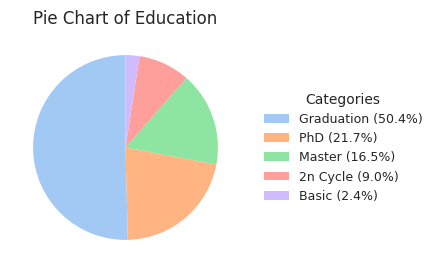

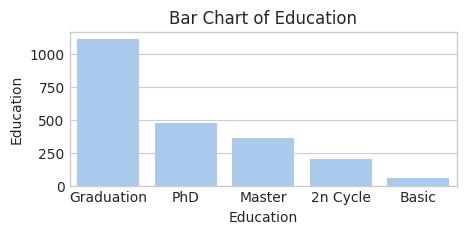

In [26]:
# Education
pie_chart('Education')
frequency('Education')

In [27]:
# more than 50% customers have graduated
# 38% customer pursuit higher education
# only small portion are undergraduates

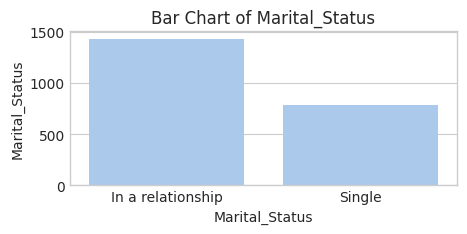

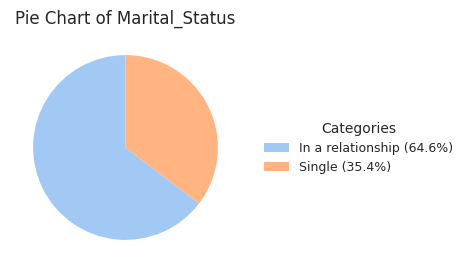

In [28]:
# Marital_Status
frequency('Marital_Status', figsize = (5,2))
pie_chart('Marital_Status')

In [29]:
# --> 35.4% single, 64.6% in a relationship

#### For boolean values

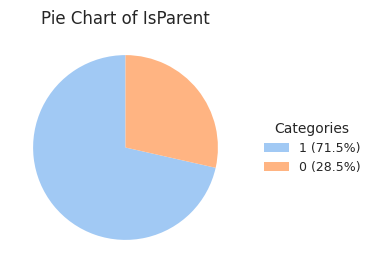

In [30]:
# IsParent
pie_chart('IsParent', figsize=(3,3))

In [31]:
# --> 71% have children -- 28% don't have children

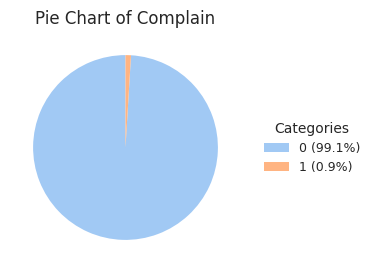

In [32]:
# Complain
pie_chart('Complain', figsize=(3,3))

In [33]:
# only 0.9% customers had complained before

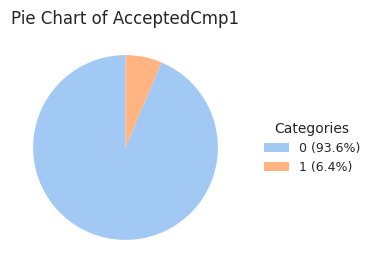

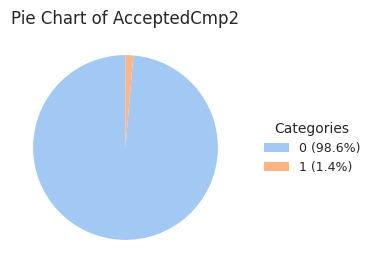

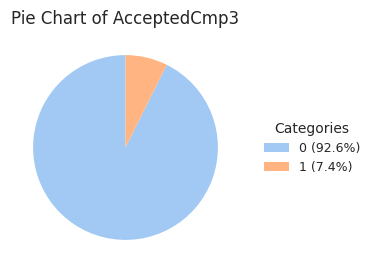

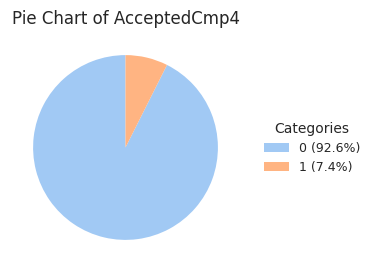

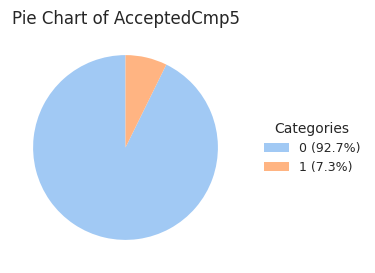

In [34]:
# Promotion Campaign: 1 for accepted / 0 for unaccepted
cmp = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
for c in cmp:
    pie_chart(c , figsize=(3,3))

In [35]:
# 6.4% accepted cmp1
# 1.3% accepted cmp2
# 7.3% accepted cmp3
# 7.5% accepted cmp4
# 7.2% accepted cmp5

#### Outliner detect and treatment for numeric values

In [36]:
# create function to draw boxplot 
def box_plot(col, figsize=(5,3)):
    plt.figure(figsize=figsize)
    sns.boxplot(x=df[col], color='skyblue', width=0.5)
    plt.title(f'Box Plot of {col}', fontsize=12)
    plt.xlabel(col)
    plt.grid(axis='x', linestyle='--', alpha=0.6)
    plt.show()

In [37]:
numeric_col = ['Age','Recency', 'Income', 'MntTotal', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

In [38]:
# create function to detect outlier
def outlier_detect(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_percent = len(outliers) / len(df) * 100

    print(f"Column: {col}")
    box_plot(col, figsize=(5,3))
    print(f"Total outliers: {len(outliers)} ({outlier_percent:.2f}%)")
    print(f"Range: min={df[col].min():.2f}, Q1={Q1:.2f}, median={df[col].median():.2f}, Q3={Q3:.2f}, max={df[col].max():.2f}")
    print(f"IQR: {IQR:.2f}")
    print(f"Lower bound: {lower_bound:.2f}, Upper bound: {upper_bound:.2f}")
    

    if len(outliers) > 0:
        print(f"Some outlier values: {outliers[col].sort_values().head(3).tolist()} ... {outliers[col].sort_values().tail(3).tolist()}")

    if len(outliers) == 0:
        print('→ No outlier')
    elif outlier_percent < 2:
        print('→ Suggestion: Drop these outliers.')
    elif outlier_percent < 10:
        print('→ Suggestion: Consider capping or transforming (log).')
    else:
        print('→ Suggestion: Check if these values are genuine, maybe keep them.')

    print('-----------------------------------------------------------------------')


In [39]:
# create function to drop outlier
def drop_outlier(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df_clean = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    print(f"{col}: dropped {len(df) - len(df_clean)} outliers ({(len(df) - len(df_clean))/len(df)*100:.2f}%)")
    
    return df_clean

##### Recency

Column: Recency


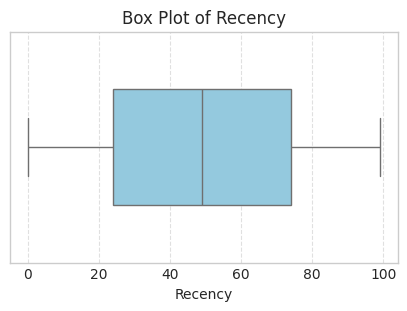

Total outliers: 0 (0.00%)
Range: min=0.00, Q1=24.00, median=49.00, Q3=74.00, max=99.00
IQR: 50.00
Lower bound: -51.00, Upper bound: 149.00
→ No outlier
-----------------------------------------------------------------------


In [40]:
# Recency
outlier_detect('Recency')

In [41]:
# Recency shows a right-skewed distribution
# --> fewer customers made recent purchases compared to those who purchased long ago
# Most customers' time since last purchase falls within the 40-80 day range

##### Income

Column: Income


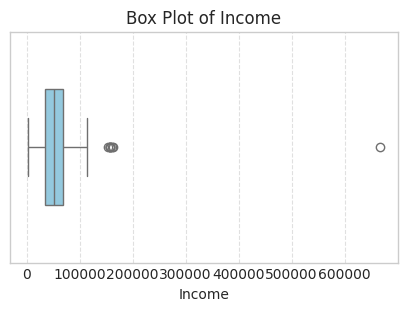

Total outliers: 8 (0.36%)
Range: min=1730.00, Q1=35233.50, median=51381.50, Q3=68522.00, max=666666.00
IQR: 33288.50
Lower bound: -14699.25, Upper bound: 118454.75
Some outlier values: [153924.0, 156924.0, 157146.0] ... [160803.0, 162397.0, 666666.0]
→ Suggestion: Drop these outliers.
-----------------------------------------------------------------------


In [42]:
# Income
outlier_detect('Income')

In [43]:
df = drop_outlier(df, 'Income')

Income: dropped 8 outliers (0.36%)


Column: Income


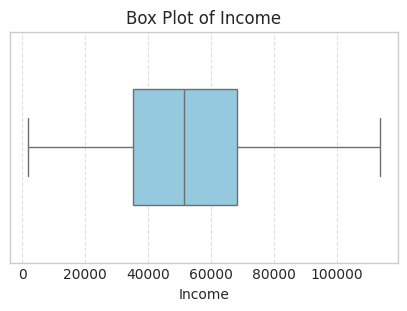

Total outliers: 0 (0.00%)
Range: min=1730.00, Q1=35191.50, median=51301.00, Q3=68289.75, max=113734.00
IQR: 33098.25
Lower bound: -14455.88, Upper bound: 117937.12
→ No outlier
-----------------------------------------------------------------------


In [44]:
outlier_detect('Income')

In [45]:
# Income Distribution After Outlier Removal:

# The interquartile range (IQR) spans roughly from 38,000 to 70,000.
# The median income is around 50,000, positioned slightly toward the lower end of the box
# The right whisker extends noticeably further than the left one, 
# confirming the presence of a longer tail on the higher-income side
# --> right skewed
# The overall income range is approximately 0 to 110,000.
# About 50% of customers have an income between 38,000 and 70,000.

##### MntWines

Column: MntWines


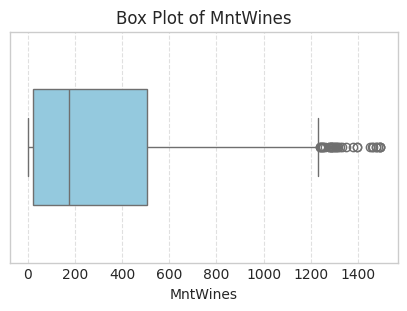

Total outliers: 34 (1.54%)
Range: min=0.00, Q1=24.00, median=176.00, Q3=507.25, max=1493.00
IQR: 483.25
Lower bound: -700.88, Upper bound: 1232.12
Some outlier values: [1239, 1241, 1245] ... [1492, 1492, 1493]
→ Suggestion: Drop these outliers.
-----------------------------------------------------------------------


In [46]:
# MntWines
outlier_detect('MntWines')

In [47]:
df = drop_outlier(df, 'MntWines')

MntWines: dropped 34 outliers (1.54%)


Column: MntWines


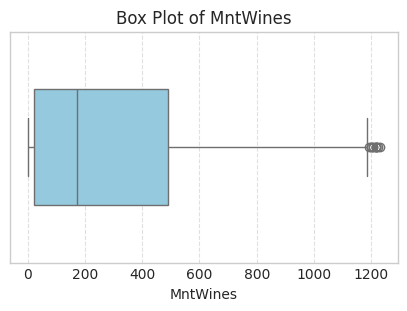

Total outliers: 11 (0.51%)
Range: min=0.00, Q1=23.00, median=171.00, Q3=490.00, max=1230.00
IQR: 467.00
Lower bound: -677.50, Upper bound: 1190.50
Some outlier values: [1193, 1200, 1200] ... [1218, 1224, 1230]
→ Suggestion: Drop these outliers.
-----------------------------------------------------------------------


In [48]:
outlier_detect('MntWines')

In [49]:
# log_MntWines Distribution
# The interquartile range spans roughly from 3 to 6
# The median wine expense 

# The interquartile range (IQR) spans roughly from 38,000 to 70,000.
# The median income is around 50,000, positioned slightly toward the lower end of the box
# The right whisker extends noticeably further than the left one, 
# confirming the presence of a longer tail on the higher-income side
# --> right skewed
# The overall income range is approximately 0 to 110,000.
# About 50% of customers have an income between 38,000 and 70,000.

##### MntFruit

Column: MntFruits


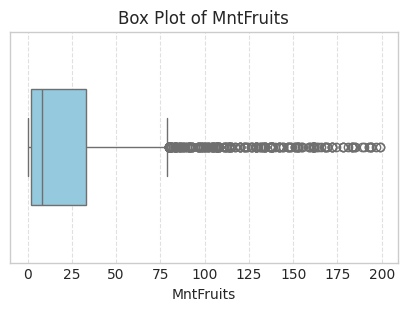

Total outliers: 241 (11.11%)
Range: min=0.00, Q1=2.00, median=8.00, Q3=33.00, max=199.00
IQR: 31.00
Lower bound: -44.50, Upper bound: 79.50
Some outlier values: [80, 80, 80] ... [197, 199, 199]
→ Suggestion: Check if these values are genuine, maybe keep them.
-----------------------------------------------------------------------


In [50]:
# MntFruits
outlier_detect('MntFruits')

In [51]:
# Không có outlier trong cột MntFruits
# Phân phối lệch trái --> phần lớn chi tiêu cho hoa quả ít hơn giá trị trung bình
# Số tiền chi cho hoa quả chủ yếu nằm trong khoảng 4 - 12

##### MntMeatProducts

Column: MntMeatProducts


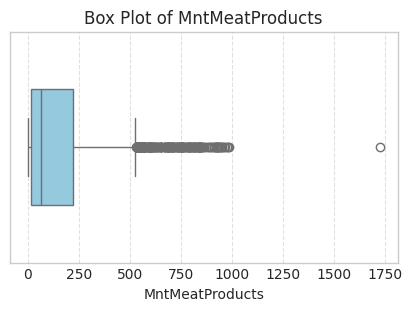

Total outliers: 189 (8.71%)
Range: min=0.00, Q1=15.00, median=65.50, Q3=220.50, max=1725.00
IQR: 205.50
Lower bound: -293.25, Upper bound: 528.75
Some outlier values: [530, 534, 534] ... [981, 984, 1725]
→ Suggestion: Consider capping or transforming (log).
-----------------------------------------------------------------------


In [52]:
outlier_detect('MntMeatProducts')

In [53]:
# Không có outliner trong cột MntMeatProducts
# Phân phối lệch trái --> phần lớn chi tiêu cho sản phẩm từ thịt ít hơn mức trung bình
# Chủ yếu chi tiêu cho sản phẩm từ thịt khoảng 20 - 45

##### MntFishProducts

Column: MntFishProducts


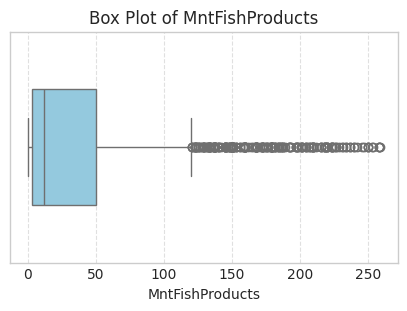

Total outliers: 219 (10.09%)
Range: min=0.00, Q1=3.00, median=12.00, Q3=50.00, max=259.00
IQR: 47.00
Lower bound: -67.50, Upper bound: 120.50
Some outlier values: [121, 121, 121] ... [258, 258, 259]
→ Suggestion: Check if these values are genuine, maybe keep them.
-----------------------------------------------------------------------


In [54]:
# MntFishProducts
outlier_detect('MntFishProducts')

In [55]:
# Không có outlier trong MntFishProducts
# Phân phối đều, không lệch
# Chủ yếu chi tiêu cho sản phẩm từ cá trong khoảng 3.5 - 5.5

##### MntSweetProducts

Column: MntSweetProducts


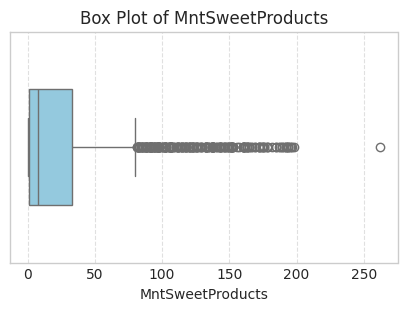

Total outliers: 243 (11.20%)
Range: min=0.00, Q1=1.00, median=8.00, Q3=32.75, max=262.00
IQR: 31.75
Lower bound: -46.62, Upper bound: 80.38
Some outlier values: [81, 81, 82] ... [197, 198, 262]
→ Suggestion: Check if these values are genuine, maybe keep them.
-----------------------------------------------------------------------


In [56]:
# MntSweetsProducts
outlier_detect('MntSweetProducts')

In [57]:
df['MntSweetProducts'].value_counts()

MntSweetProducts
0      405
1      156
2      122
3       98
4       80
      ... 
262      1
179      1
100      1
79       1
111      1
Name: count, Length: 176, dtype: int64

In [58]:
df[df['MntSweetProducts'] != 0]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Dt_year,Dt_month,Dt_day,Children,IsParent,MntTotal,Age
0,5524,1957,Graduation,Single,58138.000,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,2012,9,4,0,0,1617,68
1,2174,1954,Graduation,Single,46344.000,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,2014,3,8,2,1,27,71
2,4141,1965,Graduation,In a relationship,71613.000,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,2013,8,21,0,0,776,60
3,6182,1984,Graduation,In a relationship,26646.000,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,2014,2,10,1,1,53,41
4,5324,1981,PhD,In a relationship,58293.000,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,2014,1,19,1,1,422,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2234,8372,1974,Graduation,In a relationship,34421.000,1,0,2013-07-01,81,3,3,7,6,2,9,1,1,0,2,7,0,0,0,0,0,0,3,11,0,2013,7,1,1,1,30,51
2235,10870,1967,Graduation,In a relationship,61223.000,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0,2013,6,13,1,1,1341,58
2237,7270,1981,Graduation,Single,56981.000,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0,2014,1,25,0,0,1241,44
2238,8235,1956,Master,In a relationship,69245.000,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0,2014,1,24,1,1,843,69


In [59]:
# Vì số lượng khách hàng mua đồ ngọt chỉ có 4 người, mẫu nhỏ, nên có thể giữ lại outlier này

##### MntGoldProds

Column: MntGoldProds


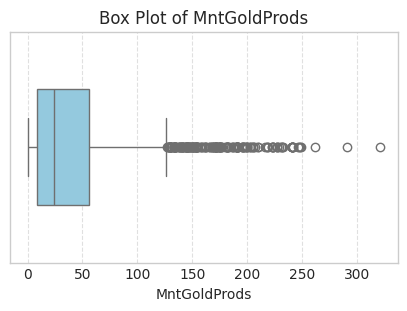

Total outliers: 198 (9.12%)
Range: min=0.00, Q1=9.00, median=24.00, Q3=56.00, max=321.00
IQR: 47.00
Lower bound: -61.50, Upper bound: 126.50
Some outlier values: [127, 128, 128] ... [262, 291, 321]
→ Suggestion: Consider capping or transforming (log).
-----------------------------------------------------------------------


In [60]:
# MntGoldProds
outlier_detect('MntGoldProds')

In [61]:
# Không có outlier
# Phân bố đều, hơi lệch trái 
# Phần lớn chi tiêu trong khoảng 10 - 275 cho vàng

##### MntTotal

Column: MntTotal


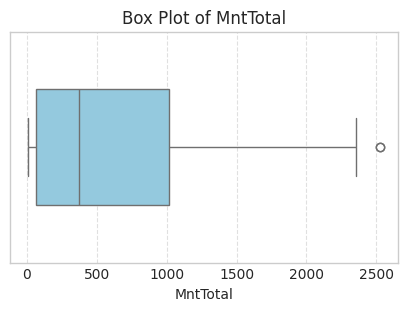

Total outliers: 2 (0.09%)
Range: min=5.00, Q1=68.00, median=375.00, Q3=1018.25, max=2525.00
IQR: 950.25
Lower bound: -1357.38, Upper bound: 2443.62
Some outlier values: [2525, 2525] ... [2525, 2525]
→ Suggestion: Drop these outliers.
-----------------------------------------------------------------------


In [62]:
# MntTotal
outlier_detect('MntTotal')

##### Age

Column: Age


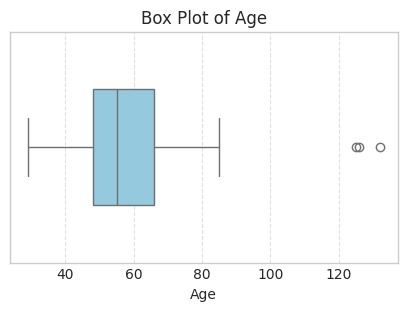

Total outliers: 3 (0.14%)
Range: min=29.00, Q1=48.00, median=55.00, Q3=66.00, max=132.00
IQR: 18.00
Lower bound: 21.00, Upper bound: 93.00
Some outlier values: [125, 126, 132] ... [125, 126, 132]
→ Suggestion: Drop these outliers.
-----------------------------------------------------------------------


In [63]:
outlier_detect('Age')

In [64]:
# Không có outliner, đều, ít lệch
# Phần lớn khách hàng nằm trong độ tuổi 40 - 65

### 5. Correlation Analysis

#### Correlation analysis between variables related to customer expense

In [65]:
df_numeric = df[numeric_col]
corr_matrix = df_numeric.corr()
corr_matrix

,Age,Recency,Income,MntTotal,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
Age,1.000,0.008,0.210,0.110,0.156,0.020,0.037,0.040,0.023,0.066
Recency,0.008,1.000,0.006,0.022,0.018,-0.007,0.028,-0.002,0.024,0.015
Income,0.210,0.006,1.000,0.821,0.734,0.546,0.701,0.557,0.560,0.428
MntTotal,0.110,0.022,0.821,1.000,0.895,0.636,0.863,0.664,0.626,0.550
MntWines,0.156,0.018,0.734,0.895,1.000,0.415,0.601,0.424,0.409,0.419
MntFruits,0.020,-0.007,0.546,0.636,0.415,1.000,0.575,0.594,0.573,0.400
MntMeatProducts,0.037,0.028,0.701,0.863,0.601,0.575,1.000,0.600,0.562,0.387
MntFishProducts,0.040,-0.002,0.557,0.664,0.424,0.594,0.600,1.000,0.588,0.425
MntSweetProducts,0.023,0.024,0.560,0.626,0.409,0.573,0.562,0.588,1.000,0.365
MntGoldProds,0.066,0.015,0.428,0.550,0.419,0.400,0.387,0.425,0.365,1.000


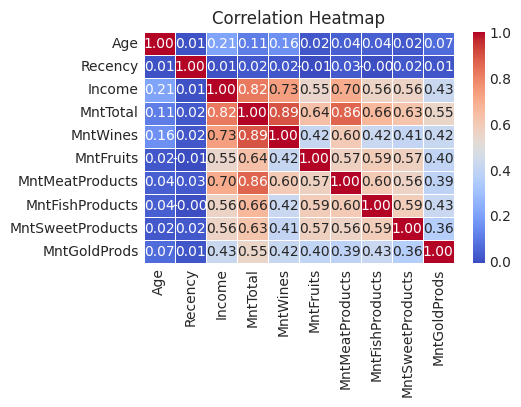

In [66]:
# draw heatmap
plt.figure(figsize=(5,3))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [67]:
# The variables MntFruits, MntMeatProducts, MntFishProducts, and MntSweetProducts 
# show very high correlations with each other (0.8–0.97), 
# --> customers tend to purchase multiple types of these products together.

# Income
# Income is strongly correlated with these spending variables as well, 
# --> customers with higher income levels tend to spend more across different product categories.

# Recency 
# Recency shows generally low correlations with most variables, 
# --> recent purchases are not strongly linked to spending or income levels. 

# Recency has a moderate correlation with Income (0.408) and MntWines (0.587) 
# --> customers with higher income or those who spend more on wine 
# tend to have made their last purchase longer ago

#### Correlation analysis between variables related to promotion campaign accepted count

In [68]:
df_cmp = df[cmp]
corr_matrix_cmp = df_cmp.corr()
corr_matrix_cmp

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5
AcceptedCmp1,1.000,0.134,0.093,0.227,0.390
AcceptedCmp2,0.134,1.000,0.081,0.237,0.168
AcceptedCmp3,0.093,0.081,1.000,-0.076,0.072
AcceptedCmp4,0.227,0.237,-0.076,1.000,0.263
AcceptedCmp5,0.390,0.168,0.072,0.263,1.000


In [69]:
df_cmp.shape

(2170, 5)

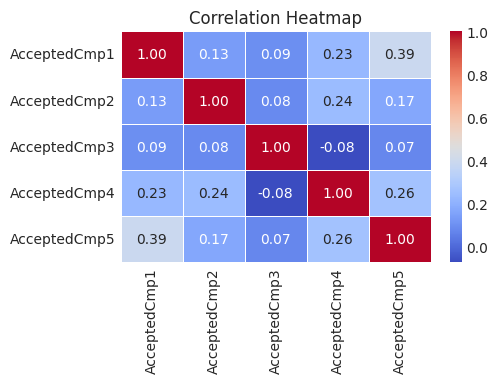

In [70]:
# draw heatmap
plt.figure(figsize=(5,3))
sns.heatmap(corr_matrix_cmp, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [71]:
# The highest correlation is between AcceptedCmp1 and AcceptedCmp5 (0.399), 
# followed by AcceptedCmp4 and AcceptedCmp5 (0.308). 
# --> customers who accepted Campaign 1 or 4 were more likely to also accept Campaign 5. 

# AcceptedCmp2 shows weak to moderate correlations with the others (ranging from 0.176 to 0.292), 
# --> modest overlap in the customers who responded positively.

# AcceptedCmp3 stands out as the least correlated with the other campaigns, 
# even showing a slight negative relationship with Campaign 4 (-0.080). 
# --> Campaign 3 was quite different, or targeted a different audience altogether.

### 6. Export Data

In [72]:
folder_path = '/workspaces/adorie-data-projects/customer-personality-analysis/data/clean/'
file_name = 'clean_data.csv'
full_path = folder_path + file_name

In [73]:
df.to_csv(full_path, index=False)